In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv('testCopy.csv')

In [3]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_test.shape

(1459, 80)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [6]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [7]:
df_test.loc[:,df_test.isnull().any()].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,...,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,None,0.0,Gd,TA,...,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD


In [8]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [9]:
df_test.drop('Alley',axis=1,inplace=True)

In [10]:
#Utilities
#Exterior1st
#Exterior2nd
#MasVnrType
#MasVnrArea 
#KitchenQual         1
#TotRmsAbvGrd        0
#Functional          2
#FireplaceQu       730
#GarageType         76
#GarageYrBlt        78
#GarageFinish       78
#GarageCars          1
#GarageArea          1
#GarageQual         78
#GarageCond         78
#PoolQC           1456
#Fence            1169
#MiscFeature      1408
#SaleType            1

df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
#df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

df_test.drop('PoolQC',axis=1, inplace = True)
df_test.drop('Fence',axis=1, inplace = True)
df_test.drop('MiscFeature',axis=1, inplace = True)
df_test.drop('GarageYrBlt',axis=1, inplace = True)


df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])




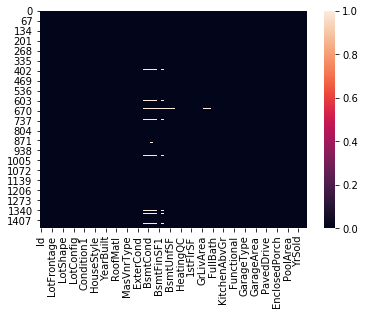

In [11]:
sns.heatmap(df_test.isnull())

In [12]:
df_test.loc[:,df_test.isnull().any()].head()

,MSZoning,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,RH,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0.0,0.0
1,RL,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0.0,0.0
2,RL,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0.0,0.0
3,RL,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,0.0,0.0
4,RL,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,0.0,0.0


In [13]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])


In [14]:
df_test.drop(['Id'],axis=1,inplace=True)

In [15]:
df_test.shape

(1459, 74)

In [16]:
df_test.to_csv('newTest.csv',index=False)

In [17]:
df = pd.read_csv('newTest.csv')

In [18]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [19]:
df.shape

(1459, 74)